In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import math

df = pd.read_csv('final.csv')
df = df.iloc[:,[3,4]]
df = df.rename(columns={"text": "Review", "rating": "Rating"})

df.drop(df[df["Rating"] == 0].index, inplace = True)
df.drop(df[df["Rating"] == 9].index, inplace = True)
df["Rating"] = df["Rating"].apply(lambda x: math.ceil(x/2) )
df['Review'] = df['Review'].apply(lambda x: re.sub('[@#$%^{}?><&*\d+]', '', x))


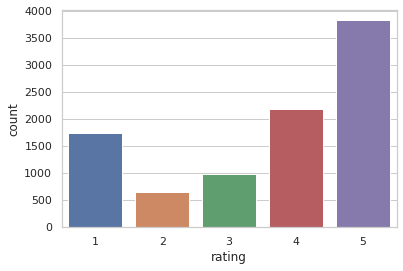

In [3]:
rating_counts = df['Rating'].value_counts()
df_counts = pd.DataFrame({'rating': rating_counts.index, 'count': rating_counts.values})

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="rating", y="count", data=df_counts)

In [3]:
texts = df['Review'].values
ratings = df['Rating'].astype(float).values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(texts, ratings, test_size=0.20, shuffle=True,random_state=2)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(binary=True, min_df = 10)
cv.fit_transform(x_train)
train_feature_set=cv.transform(x_train)
test_feature_set=cv.transform(x_test)
trained_feature_set=cv.transform(texts)



In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
lr = LogisticRegression(C = 0.5, random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)

print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred,average='weighted'))



Accuracy:  0.678
0.6720475290853808


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

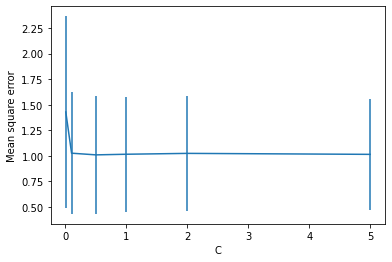

In [30]:
mean_error=[]; std_error=[]
C = [0.005,0.1,0.50,1,2,5]
for Ci in C:
    temp=[]
    model = LogisticRegression(C=Ci)
    kf = KFold(n_splits=10)
    for train, test in kf.split(trained_feature_set):
        model.fit(trained_feature_set[train], ratings[train])
        ypred = model.predict(trained_feature_set[test])
        temp.append(mean_squared_error(ratings[test],ypred))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
    
fig = plt.figure()
plt.errorbar(C,mean_error,yerr=std_error)
plt.xlabel('C'); plt.ylabel('Mean square error')
fig.savefig('r333idge.png',dpi=100)
plt.show()

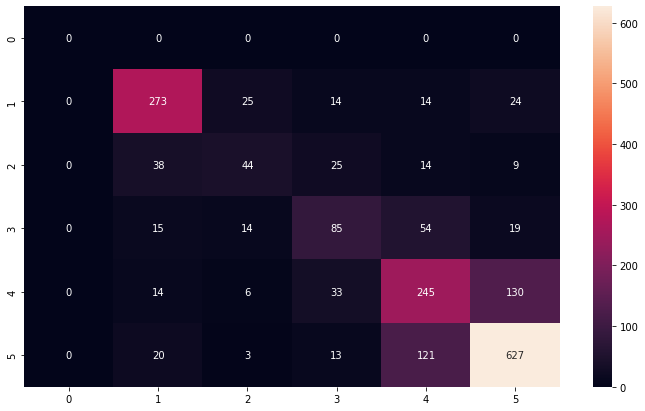

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = tf.math.confusion_matrix(
    y_test, 
    y_pred
)

plt.figure(figsize = (12,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.show()




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
lr = LogisticRegression(C = 0.5, random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)

print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred,average='weighted'))


Accuracy:  0.408
0.1664341169592588


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


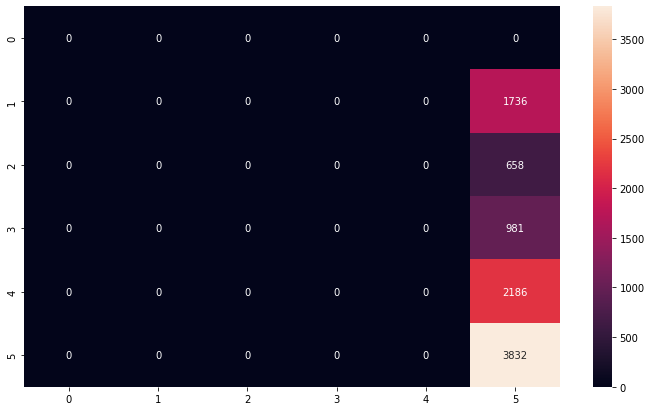

In [42]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(trained_feature_set, ratings)

y = dummy_clf.predict(trained_feature_set)

print("Accuracy: ",round(metrics.accuracy_score(ratings,y),3))
print(precision_score(ratings, y,average='weighted'))
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = tf.math.confusion_matrix(
    ratings, 
    y
)

plt.figure(figsize = (12,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.show()